In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

2023-01-15 17:14:09.132070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = uni[uni.source_id == int(48977371798954368)].index[0]

Already have data downloaded for Gaia ID 48977371798954368.
### Running Simple Astropy Lomb-Scargle on Sector 43-44 on star 48977371798954368 ###
### Completed Simple Astropy Lomb-Scargle for Sector 43-44 on star 48977371798954368 ###
### Running Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###


100%|███████████████████████████████████████| 1499/1499 [02:28<00:00, 10.06it/s]


### Completed Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###
### Running Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Completed Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Running ACF Estimation on star 48977371798954368 ###
### Completed ACF Estimation for Sector 43-44 on star 48977371798954368 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


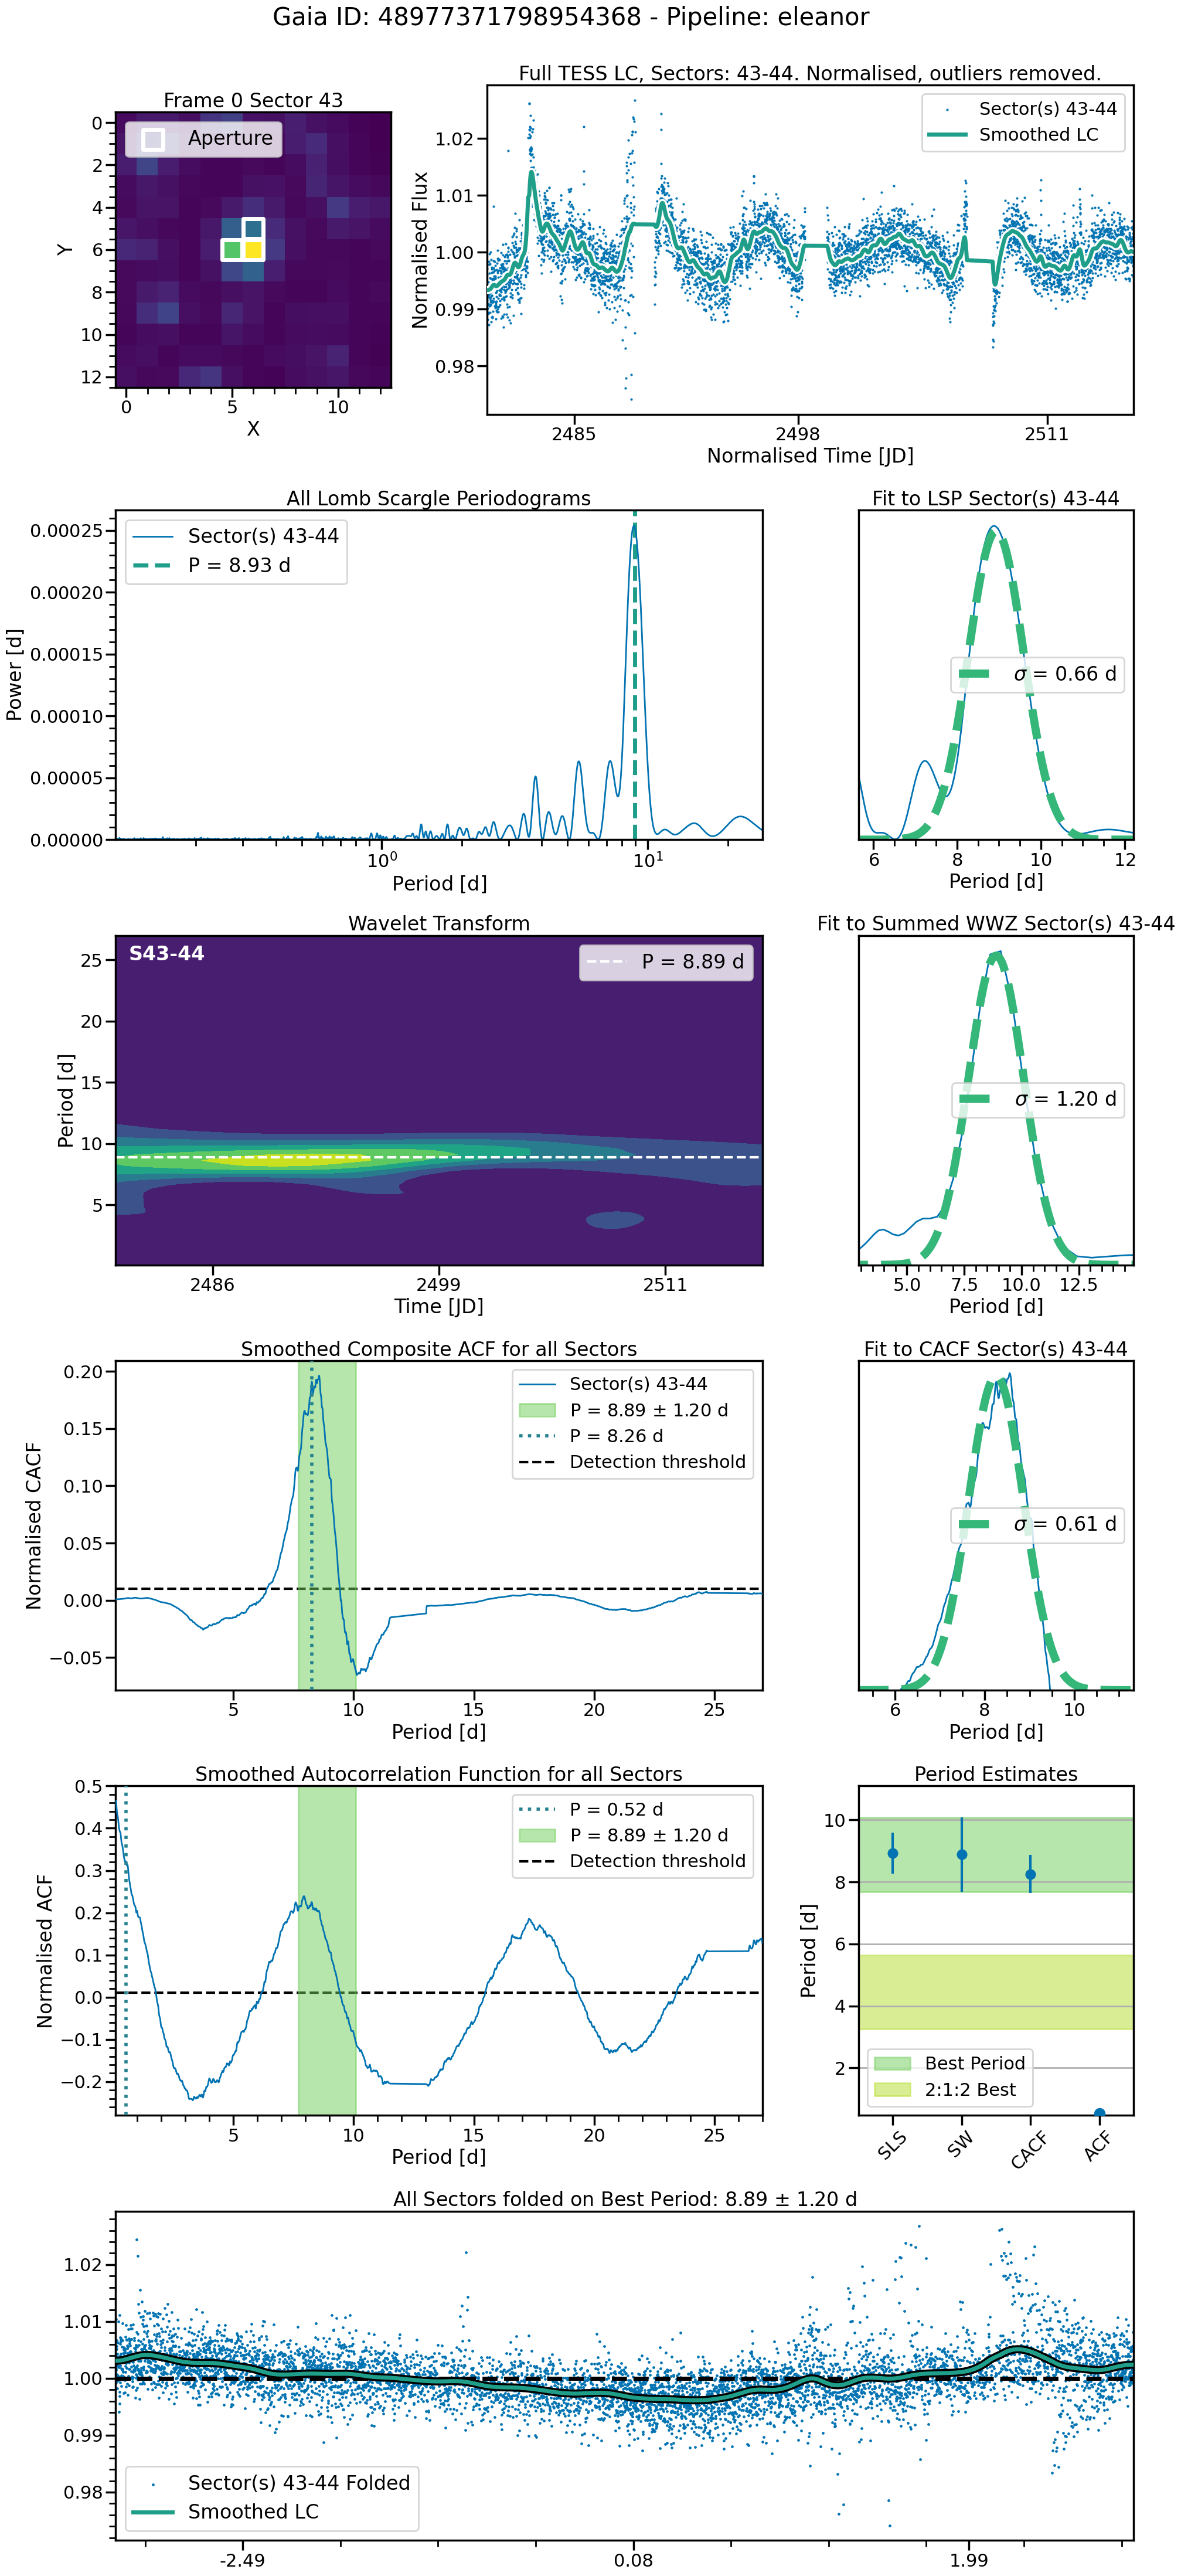

Already have data downloaded for Gaia ID 48977371798954368.
Removing 249 bad data points (out of 3408) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median
Removing 74 bad data points (out of 3278) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves. Weighting=median
### Running Simple Astropy Lomb-Scargle on Sector 43-44 on star 48977371798954368 ###
### Completed Simple Astropy Lomb-Scargle for Sector 43-44 on star 48977371798954368 ###
### Running Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###


100%|███████████████████████████████████████| 1499/1499 [03:36<00:00,  6.91it/s]


### Completed Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###
### Running Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Completed Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Running ACF Estimation on star 48977371798954368 ###
### Completed ACF Estimation for Sector 43-44 on star 48977371798954368 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


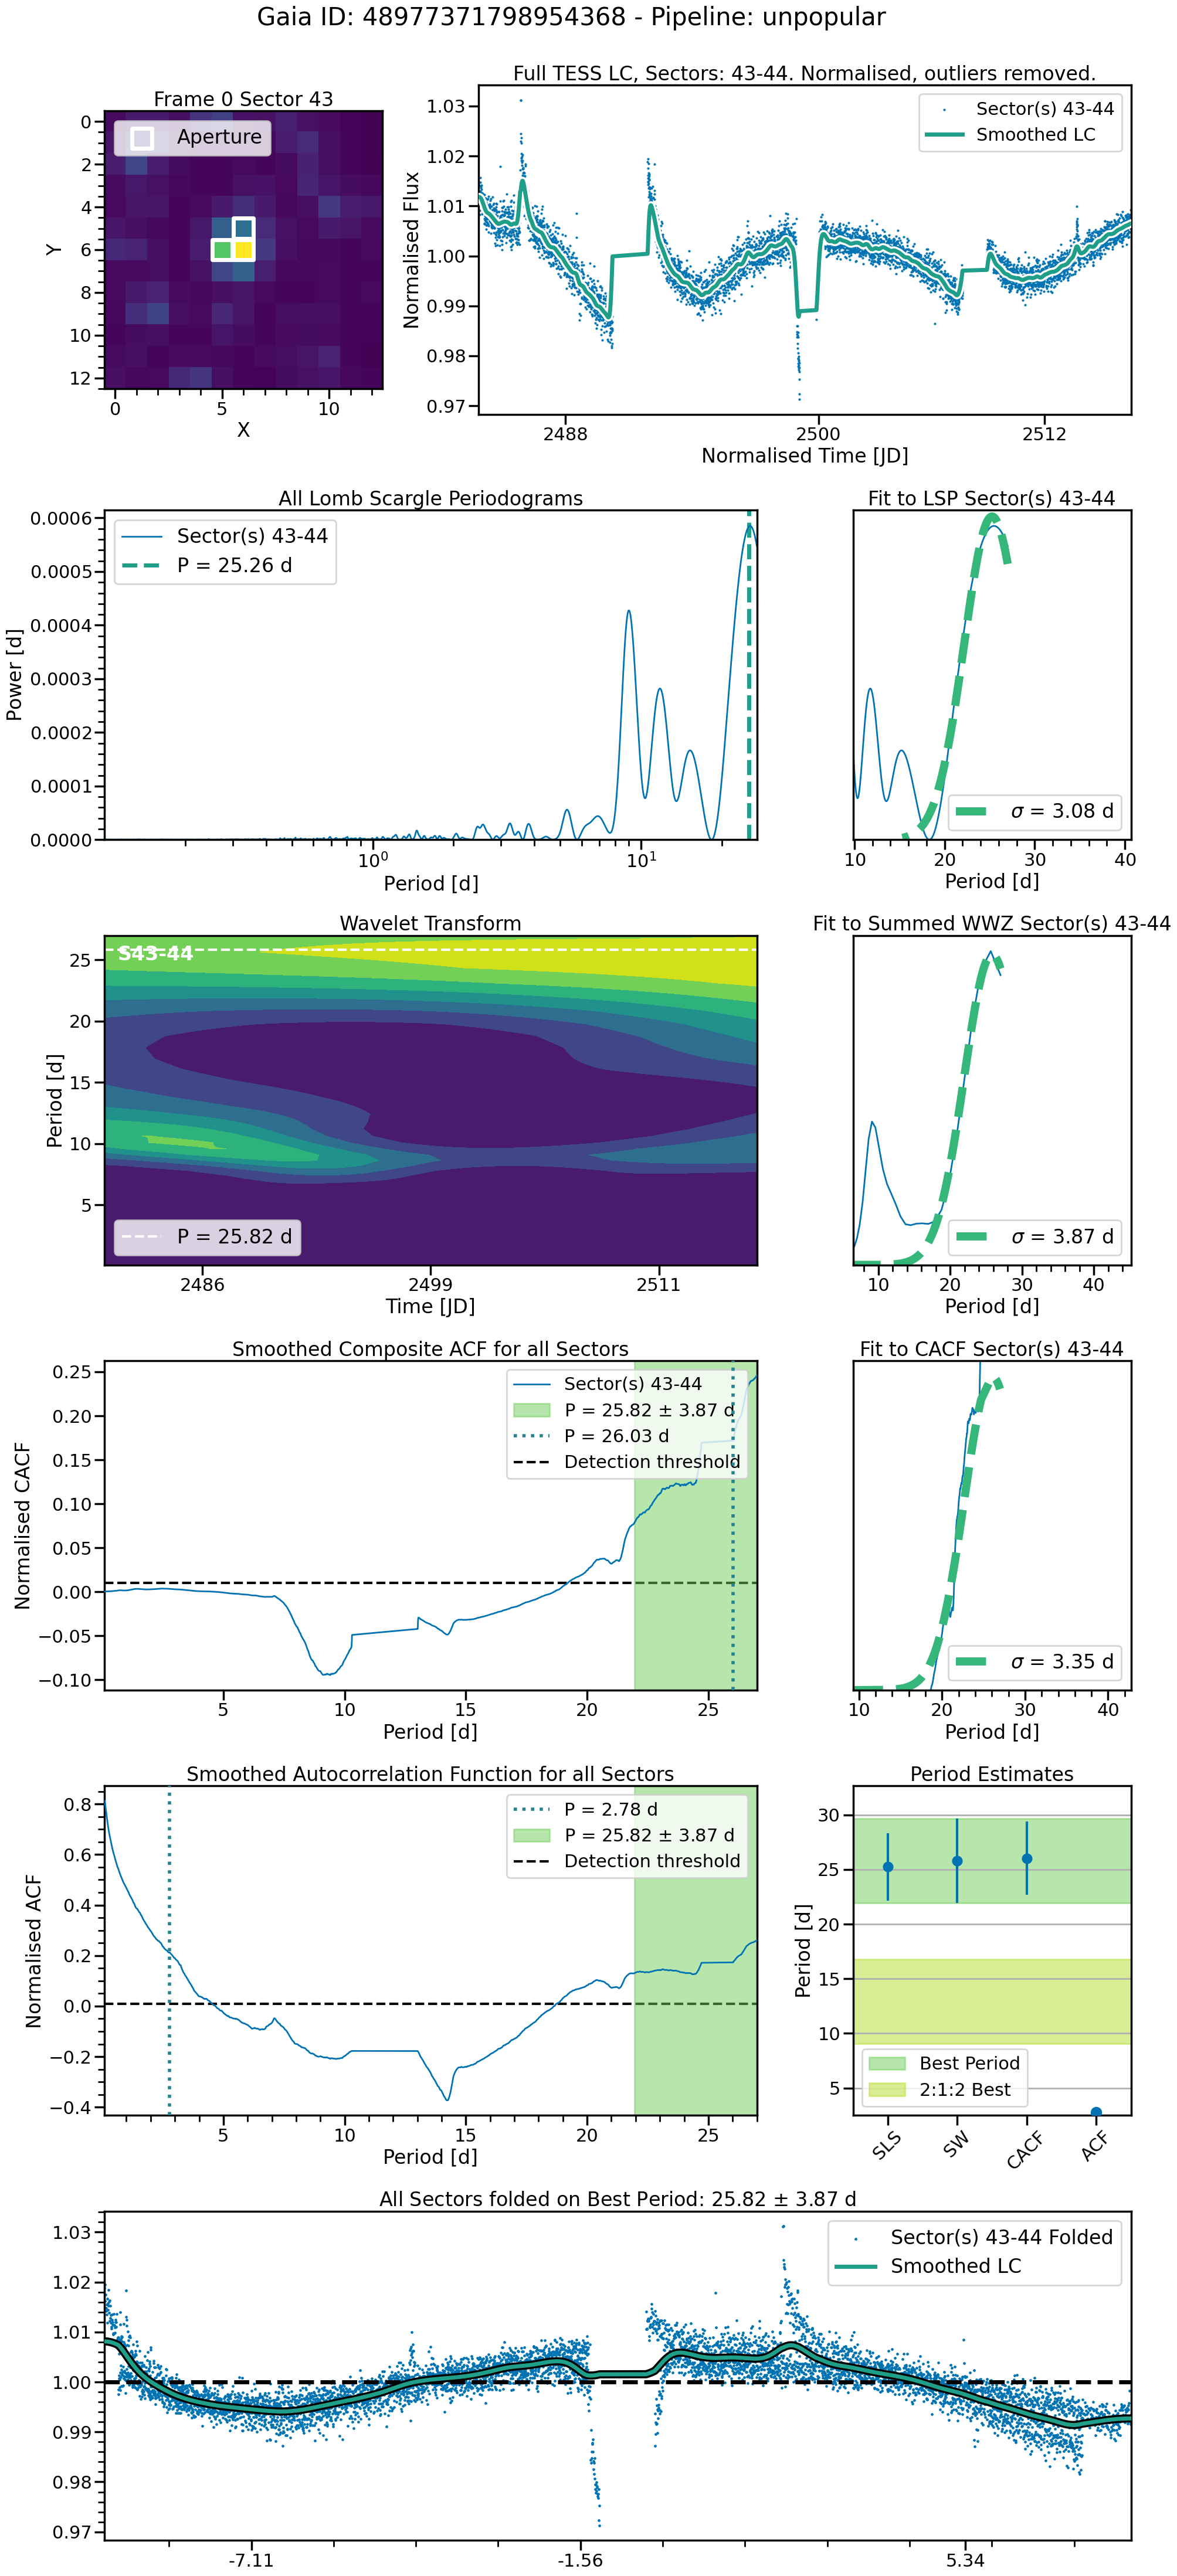

Already have data downloaded for Gaia ID 48977371798954368.


Running pixels in aperture: 100%|████████████| 300/300 [00:01<00:00, 167.46it/s]


### Running Simple Astropy Lomb-Scargle on Sector 43-44 on star 48977371798954368 ###
### Completed Simple Astropy Lomb-Scargle for Sector 43-44 on star 48977371798954368 ###
### Running Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###


100%|███████████████████████████████████████| 1499/1499 [04:15<00:00,  5.86it/s]


### Completed Wavelet Estimation for Sector 43-44 on star 48977371798954368 ###
### Running Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Completed Composite ACF estimation for Sector 43-44 on star 48977371798954368 ###
### Running ACF Estimation on star 48977371798954368 ###
### Completed ACF Estimation for Sector 43-44 on star 48977371798954368 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


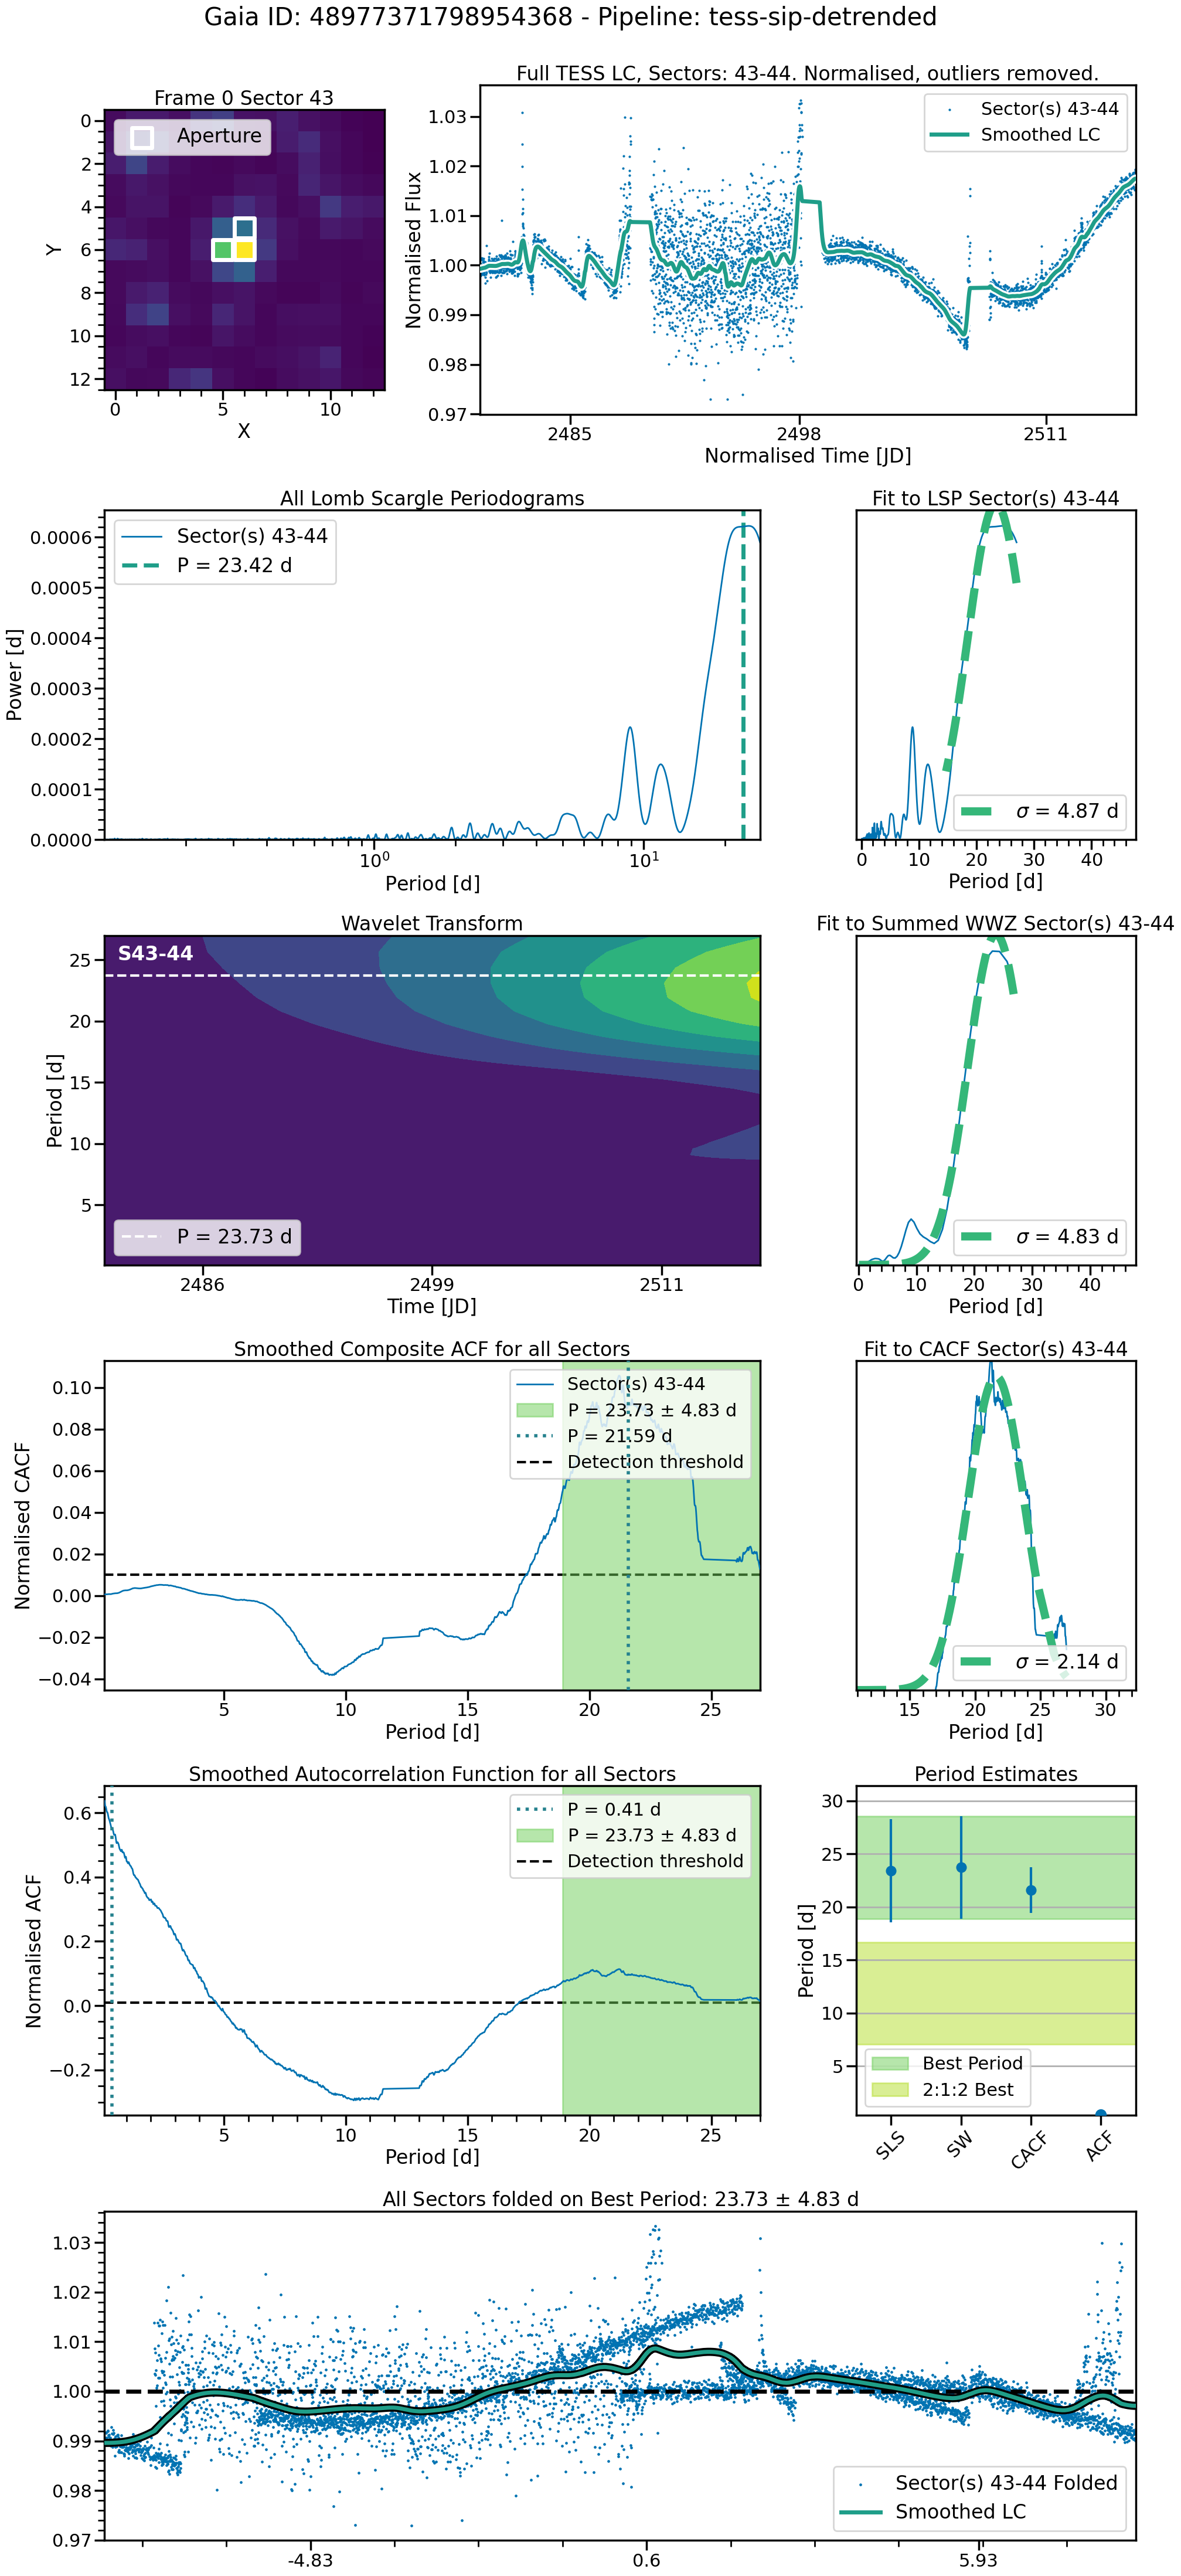

In [4]:
for method in ['eleanor','unpopular','tess-sip-detrended']:#'eleanor', 'eleanor-corner','eleanor-pca', 'unpopular','tess-sip']:
    j = janet.boot(uni, index=index, pipeline = method)
    j.prepare_data()
    j.get_rotation(period_range=(0.1, 27))
    j.validate_rotation()
    j.view()
    plt.show()

In [5]:
j.results

,SLS,e_SLS,h_SLS,f_SLS,SW,e_SW,h_SW,CACF,e_CACF,h_CACF,...,f_p2p_ACF,s_SLS,s_SW,s_CACF,s_ACF,f_overall,overall,e_overall,p2p_overall,method_overall
43-44,23.421899,4.866529,0.000667,2.0,23.732337,4.82572,1.053506,21.594797,2.143031,0.099309,...,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
best,23.421899,4.866529,0.000667,2.0,23.732337,4.82572,1.053506,21.594797,2.143031,0.099309,...,NaN,43-44,43-44,43-44,43-44,4,23.732337,4.82572,0.01904,SW


Cleaning up the data seems to have fixed things. Either way we'll still just change the data downloading process to avoid anything like this in the future.

In [6]:
sys.exit()

SystemExit: 

In [ ]:
j.void['r_43-44']['raw_lc'].plot()

In [ ]:
j.void['rawlc_43-44'].plot()

Let's fix the cpm times

In [ ]:
import glob
from astropy.coordinates import SkyCoord
import os
import astropy.units as u
rastr = str(j.ra)
step = len(rastr.split('.')[0])
decstr = str(j.dec)
step = len(decstr.split('.')[0])
sfiles = np.sort(glob.glob(f'{os.path.expanduser("~")}/.eleanor/tesscut/*{rastr[:(6+step)]}*{decstr[:(6+step)]}*'))
coords = SkyCoord(ra = j.ra, dec = j.dec, unit = (u.deg, u.deg))

if len(sfiles) == 0:
    sfiles = np.sort(glob.glob(f'{os.path.expanduser("~")}/.eleanor/tesscut/*{rastr[:(4+step)]}*{decstr[:(4+step)]}*'))
    if len(sfiles) == 0:
        raise ValueError("No tesscut files could be found for this target.")

if len(sfiles) < len(j.sectorlist):
    raise ValueError("There are more sectors available than have been "+
                    "loaded into the sectorlist. Reset the data.")

In [ ]:
sfiles